In [1]:
from math import floor
import numpy as np
import pandas as pd

from sklearn import datasets as skds

import seaborn as sns
import matplotlib.pyplot as plt

/Users/akshayprabhakant/miniconda3/lib/python3.9/site-packages/scipy/__init__.py:132: UserWarning: A NumPy version >=1.21.6 and <1.28.0 is required for this version of SciPy (detected version 1.21.5)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
diab_ds = skds.load_diabetes(as_frame=True)
print(diab_ds.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

This has both categorical and numerical features, hence this will be used.

In [3]:
X = diab_ds.frame
display(X.head(10))

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0


In [4]:
print(X['s2'].value_counts())

-0.001001    5
 0.016222    5
 0.056619    4
-0.024800    4
-0.047034    4
            ..
 0.041274    1
 0.050042    1
 0.089186    1
-0.026053    1
 0.027809    1
Name: s2, Length: 302, dtype: int64


# Bivariate Analysis

## Categorical vs Numerical RV

<AxesSubplot: xlabel='sex', ylabel='age'>

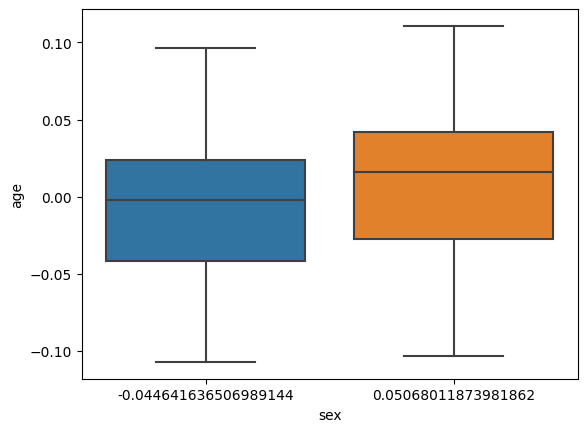

In [5]:
# box plot
sns.boxplot(x='sex', y='age', data=X)
# x = categorical, y = numerical

<font size=5 color="green">For box plots, the min and max whiskers are located at Q1 - 1.5\*IQR and Q3 + 1.5\*IQR, where IQR = Q3 - Q1.</font>

<AxesSubplot: xlabel='sex', ylabel='age'>

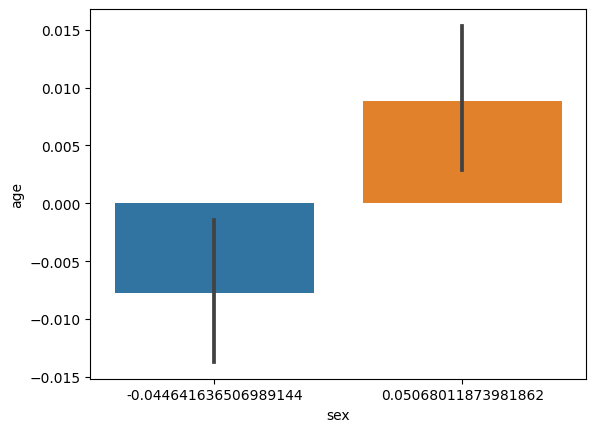

In [6]:
# bar plot
sns.barplot(x='sex', y='age', data=X)
# tells the mean value of the numerical variable per categorical variable value
# the black line is called the "Error Line"

## Numerical vs Numerical

<AxesSubplot: xlabel='bmi', ylabel='age'>

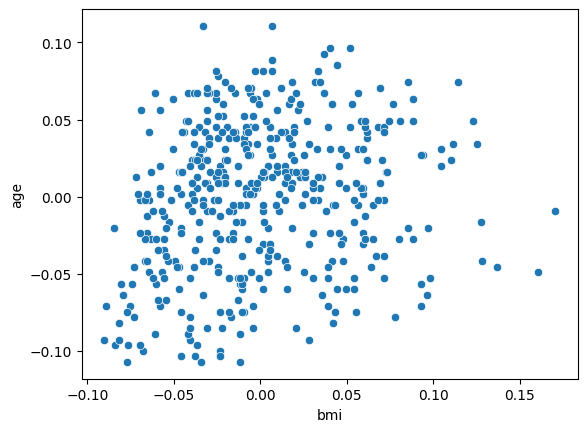

In [7]:
# scatter
sns.scatterplot(x='bmi', y='age', data=X)

## Categorical vs Categorical

In [8]:
# since we don't have 2 categorical variables, lets make one out of age
# put age in brackets of 0-10, 10-20...90-100, lets call them bracket 1,2,3...10

min_age = min(X['age'])
# X['ageRange'] = X.apply(lambda row: floor(row['age']/10)+1, axis=1)
X['ageRange'] = X.apply(lambda row: floor(row['age']/min_age)+1, axis=1)
display(X.head(10))
print(X['ageRange'].value_counts())

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target,ageRange
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0,0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0,1
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0,0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0,1
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0,0
5,-0.092695,-0.044642,-0.040696,-0.019442,-0.068991,-0.079288,0.041277,-0.076395,-0.041176,-0.096346,97.0,1
6,-0.045472,0.050680,-0.047163,-0.015999,-0.040096,-0.024800,0.000779,-0.039493,-0.062917,-0.038357,138.0,1
7,0.063504,0.050680,-0.001895,0.066629,0.090620,0.108914,0.022869,0.017703,-0.035816,0.003064,63.0,0
8,0.041708,0.050680,0.061696,-0.040099,-0.013953,0.006202,-0.028674,-0.002592,-0.014960,0.011349,110.0,0
9,-0.070900,-0.044642,0.039062,-0.033213,-0.012577,-0.034508,-0.024993,-0.002592,0.067737,-0.013504,310.0,1


 0    238
 1    199
 2      3
-1      2
Name: ageRange, dtype: int64


<AxesSubplot: xlabel='ageRange'>

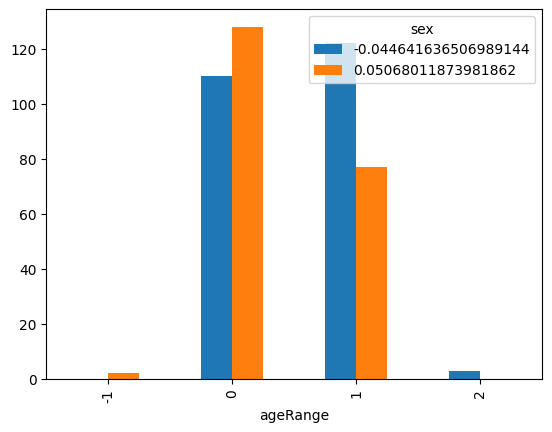

In [9]:
# contingency tables, i.e. multivariate frequency table
pd.crosstab(X['ageRange'], X['sex']).plot(kind='bar')

Regarding mean, its shifted drastically by the presence of a few outliers.

# Measure of Spread - IQR

In [10]:
print(np.percentile(X['age'], 10));print(np.percentile(X['age'], 95))
print(f"IQR for age = {np.percentile(X['age'], 75) - np.percentile(X['age'], 25)}")

-0.06726770864614018
0.0707687524925978
IQR for age = 0.07537517285865299


## Variance vs Mean-absolute deviation
1. squaring is a smooth(continuous, differential at x=0) as opposed to absolute/modulus function(non-differential at x=0)

# Probability Density Function (pdf)

/var/folders/w9/wpf4tzps31g9gkyyfw7j56c00000gn/T/ipykernel_1542/911189045.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X['bmi'])


<AxesSubplot: xlabel='bmi', ylabel='Density'>

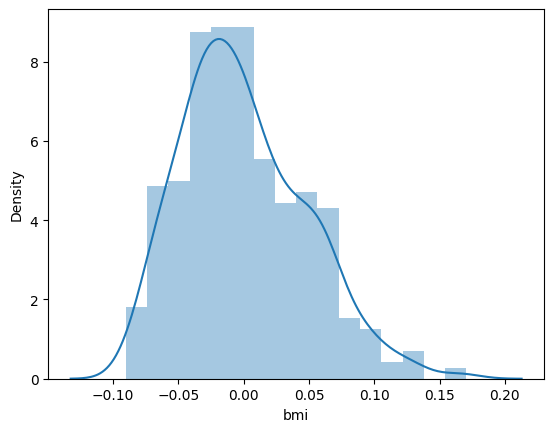

In [11]:
sns.distplot(X['bmi'])

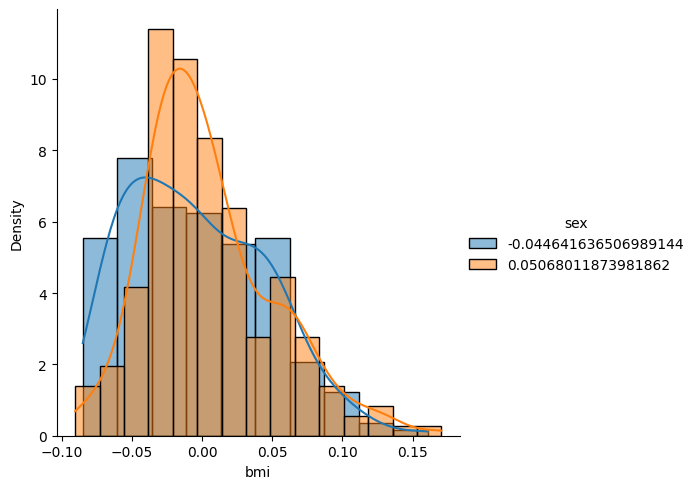

In [12]:
# plot pdf per categorical
sns.FacetGrid(X, hue='sex', height=5).map(sns.histplot, 'bmi', stat='density', kde=True).add_legend()

# Cumulative Density Function (cdf)
1. main use: determining P(x $\le$ X) for a given value X.

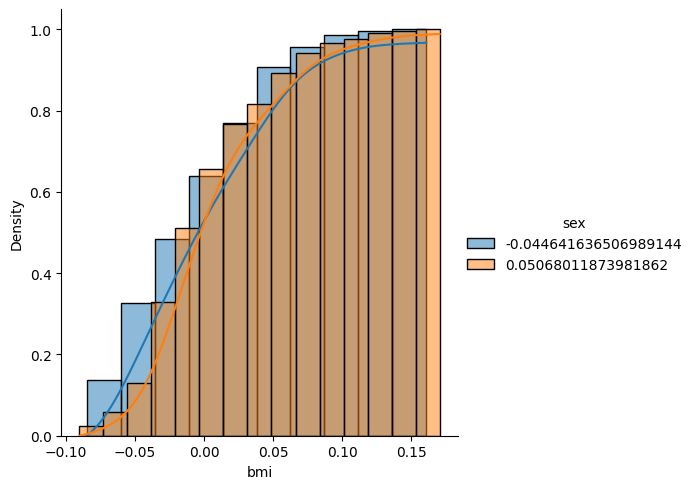

In [13]:
sns.FacetGrid(X, hue='sex', height=5).map(sns.histplot, 'bmi', cumulative=True, stat='density', kde=True).add_legend()

# Z-score
1. What percentile is a particular value located at?
2. This in some way uses the cdf.

**Statement**: A student scores 700 in an exam where mean = 500, standard deviation = 120 with marks normally distributed. How well/badly has the student performed?

In [14]:
from scipy.stats import norm
print(norm.cdf((700-500)/120))

0.9522096477271853


Area under the curve is 0.95, i.e. score of 700 in an exam where mean = 500, standard deviation = 120 with marks normally distributed , the student is better than 95% students.

In [15]:
# when you don't want to use scipy

import math
z = (700-500)/120
# Calculate the CDF using the error function (erf) from the math library
cdf_value = 0.5 * (1 + math.erf(z / math.sqrt(2)))
print(cdf_value)

0.9522096477271853
